In [3]:
from context import speechact
import speechact.classifier.embedding as emb
import speechact.classifier.base as b
import speechact.evaluation as evaluation
import speechact.corpus as corp
import speechact.annotate as anno
import matplotlib.pyplot as plt


labels = [act.value for act in emb.SPEECH_ACTS]

# Load upsampled data.
corpus = corp.Corpus('../data/annotated data/dev-set-sentiment-upsampled.conllu.bz2')
test_corpus = corp.Corpus('../data/annotated data/dev-set-sentiment-test-upsampled.conllu.bz2')
train_corpus = corp.Corpus('../data/annotated data/dev-set-sentiment-train-upsampled.conllu.bz2')

results = {}




def plot_loss_histories(loss_history: list[float], dev_loss_history: list[float]):
    epochs = range(1, len(loss_history) + 1)
    plt.plot(epochs, loss_history, label='Training Loss')
    plt.plot(epochs, dev_loss_history, label='Dev Loss')
    plt.title('Training and Dev Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def plot_accuracy_history(history: evaluation.TrainAccuracyHistory):
    plt.plot(history.data_amount, history.accuracies, label='Training Loss')
    plt.title('Accuracy on Dev Data')
    plt.xlabel('Batches')
    plt.ylabel('Accuracy')
    plt.ylim(0.0, 1.0)
    plt.show()


def train_model(corpus: corp.Corpus, 
                dev_corpus: corp.Corpus, 
                model_name: str,
                network_factory: emb.NetworkFactory|None = None,
                epochs = 10):
    
    print('Load classifier')
    classifier = emb.EmbeddingClassifier(network_factory=network_factory)

    print('Load dataset')
    dataset = emb.CorpusDataset(corpus)
    dev_dataset = emb.CorpusDataset(dev_corpus)

    batch_size = 32

    loss_history = []
    dev_loss_history = []
    accuracy_history = evaluation.TrainAccuracyHistory(dev_corpus, classifier, batch_size)
    
    print(f'Train classifier: {model_name}')
    classifier.train(dataset, 
                     batch_size, 
                     loss_history=loss_history, 
                     dev_loss_history=dev_loss_history,
                     dev_data=dev_dataset,
                     num_epochs=epochs,
                     batch_callback=accuracy_history.compute_accuracy,
                     callback_each_batch=20)
    classifier.save(model_name)

    plot_loss_histories(loss_history, dev_loss_history)
    plot_accuracy_history(accuracy_history)
    



def evaluate_model(corpus: corp.Corpus, 
                   model_name: str,
                   network_factory: emb.NetworkFactory|None = None):
    
    print('Load classifier')
    classifier = emb.EmbeddingClassifier(network_factory=network_factory)
    classifier.load(model_name)

    print(f'Evaluate classifier: {model_name}')
    return evaluation.evaluate(
        corpus,
        classifier,
        labels,
        draw_conf_matrix=True
    )

# DEV: 80% Training Data (balanced)

In [16]:
train_model(train_corpus, test_corpus, model_name='../models/neural/hidden_256/dev-model-bal-80.pth')
results['dev-model-bal-80'] = evaluate_model(
    test_corpus, model_name='../models/neural/hidden_256/dev-model-bal-80.pth')

Load classifier


KeyboardInterrupt: 

# DEV: 80% Training Data (balanced) no hidden

Load classifier
Load dataset
Train classifier: ../models/neural/no-hidden/dev-model-bal-80.pth


Training: epoch 1/10", unit="batch: 100%|██████████| 137/137 [01:34<00:00,  1.45it/s]


Epoch 1/10, Loss: 1.2225810167563222


Eval on dev data: epoch 1/10", unit="batch: 100%|██████████| 34/34 [00:07<00:00,  4.28it/s]


Epoch 1/10, Dev loss: 1.0989443274105297


Training: epoch 2/10", unit="batch: 100%|██████████| 137/137 [01:32<00:00,  1.47it/s]


Epoch 2/10, Loss: 1.000247291839906


Eval on dev data: epoch 2/10", unit="batch: 100%|██████████| 34/34 [00:08<00:00,  4.17it/s]


Epoch 2/10, Dev loss: 0.9659255304757286


Training: epoch 3/10", unit="batch: 100%|██████████| 137/137 [01:32<00:00,  1.49it/s]


Epoch 3/10, Loss: 0.8760588617220412


Eval on dev data: epoch 3/10", unit="batch: 100%|██████████| 34/34 [00:08<00:00,  4.20it/s]


Epoch 3/10, Dev loss: 0.8867289529127234


Training: epoch 4/10", unit="batch: 100%|██████████| 137/137 [01:33<00:00,  1.47it/s]


Epoch 4/10, Loss: 0.7955772267640943


Eval on dev data: epoch 4/10", unit="batch: 100%|██████████| 34/34 [00:07<00:00,  4.37it/s]


Epoch 4/10, Dev loss: 0.833664307699484


Training: epoch 5/10", unit="batch: 100%|██████████| 137/137 [01:31<00:00,  1.50it/s]


Epoch 5/10, Loss: 0.7355782711592904


Eval on dev data: epoch 5/10", unit="batch: 100%|██████████| 34/34 [00:07<00:00,  4.26it/s]


Epoch 5/10, Dev loss: 0.8019238605218775


Training: epoch 6/10", unit="batch: 100%|██████████| 137/137 [01:33<00:00,  1.47it/s]


Epoch 6/10, Loss: 0.6903974453028101


Eval on dev data: epoch 6/10", unit="batch: 100%|██████████| 34/34 [00:08<00:00,  4.25it/s]


Epoch 6/10, Dev loss: 0.7816204779288348


Training: epoch 7/10", unit="batch: 100%|██████████| 137/137 [01:27<00:00,  1.56it/s]


Epoch 7/10, Loss: 0.6543363750415997


Eval on dev data: epoch 7/10", unit="batch: 100%|██████████| 34/34 [00:08<00:00,  3.83it/s]


Epoch 7/10, Dev loss: 0.7580219340675017


Training: epoch 8/10", unit="batch: 100%|██████████| 137/137 [01:41<00:00,  1.35it/s]


Epoch 8/10, Loss: 0.6250043137230142


Eval on dev data: epoch 8/10", unit="batch: 100%|██████████| 34/34 [00:08<00:00,  3.93it/s]


Epoch 8/10, Dev loss: 0.7454917877912521


Training: epoch 9/10", unit="batch: 100%|██████████| 137/137 [01:42<00:00,  1.34it/s]


Epoch 9/10, Loss: 0.5971636515464226


Eval on dev data: epoch 9/10", unit="batch: 100%|██████████| 34/34 [00:08<00:00,  3.81it/s]


Epoch 9/10, Dev loss: 0.7448173375690684


Training: epoch 10/10", unit="batch: 100%|██████████| 137/137 [01:41<00:00,  1.35it/s]


Epoch 10/10, Loss: 0.5781708324912691


Eval on dev data: epoch 10/10", unit="batch: 100%|██████████| 34/34 [00:09<00:00,  3.76it/s]

Epoch 10/10, Dev loss: 0.7371454370372436
Training complete
Saving model to "../models/neural/no-hidden/dev-model-bal-80.pth"


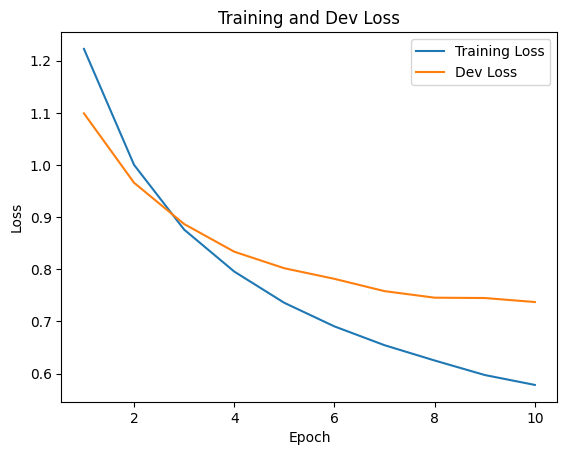

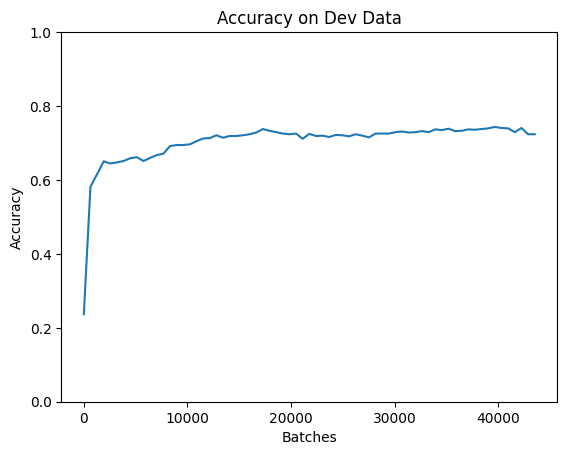

Load classifier
Loading model from "../models/neural/no-hidden/dev-model-bal-80.pth"
Evaluate classifier: ../models/neural/no-hidden/dev-model-bal-80.pth
Accuracy: 0.7481203007518797
Classification report:
              precision    recall  f1-score   support

   assertion       0.64      0.67      0.66       266
    question       0.75      0.77      0.76       266
   directive       0.82      0.90      0.86       266
  expressive       0.79      0.65      0.71       266

    accuracy                           0.75      1064
   macro avg       0.75      0.75      0.75      1064
weighted avg       0.75      0.75      0.75      1064

Confusion matrix:
            assertion  question  directive  expressive
assertion         179        27         22          38
question           45       205          9           7
directive           0        26        240           0
expressive         55        17         22         172


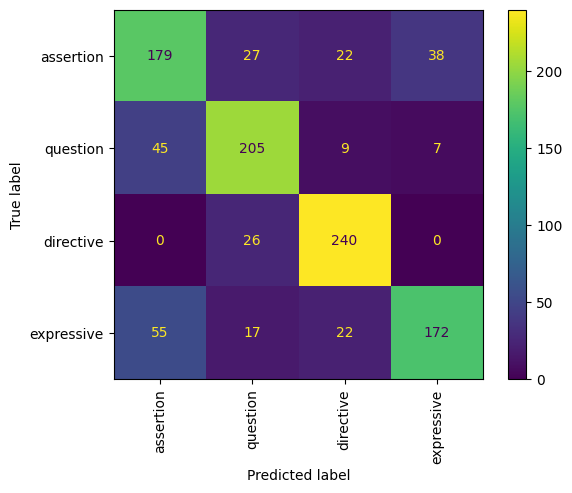

In [5]:
train_model(train_corpus, 
            test_corpus, 
            model_name='../models/neural/no-hidden/dev-model-bal-80.pth',
            epochs=10)
results['dev-model-bal-80'] = evaluate_model(
    test_corpus, model_name='../models/neural/no-hidden/dev-model-bal-80.pth')

# DEV: Softmax Perceptron 80%

Load classifier
Load dataset
Train classifier: ../models/neural/softmax_perceptron/dev-model-sm-perc-80.pth


Training: epoch 1/30", unit="batch: 100%|██████████| 137/137 [00:33<00:00,  4.15it/s]


Epoch 1/30, Loss: 1.3316964807301541


Eval on dev data: epoch 1/30", unit="batch: 100%|██████████| 34/34 [00:07<00:00,  4.53it/s]


Epoch 1/30, Dev loss: 1.2763507786919088


Training: epoch 2/30", unit="batch: 100%|██████████| 137/137 [00:32<00:00,  4.28it/s]


Epoch 2/30, Loss: 1.2332771381322485


Eval on dev data: epoch 2/30", unit="batch: 100%|██████████| 34/34 [00:07<00:00,  4.60it/s]


Epoch 2/30, Dev loss: 1.210216676487642


Training: epoch 3/30", unit="batch: 100%|██████████| 137/137 [00:31<00:00,  4.31it/s]


Epoch 3/30, Loss: 1.1731241558590075


Eval on dev data: epoch 3/30", unit="batch: 100%|██████████| 34/34 [00:07<00:00,  4.60it/s]


Epoch 3/30, Dev loss: 1.1684065110543196


Training: epoch 4/30", unit="batch: 100%|██████████| 137/137 [00:31<00:00,  4.31it/s]


Epoch 4/30, Loss: 1.136000056336396


Eval on dev data: epoch 4/30", unit="batch: 100%|██████████| 34/34 [00:07<00:00,  4.54it/s]


Epoch 4/30, Dev loss: 1.1434989185894238


Training: epoch 5/30", unit="batch: 100%|██████████| 137/137 [00:32<00:00,  4.23it/s]


Epoch 5/30, Loss: 1.106657780870034


Eval on dev data: epoch 5/30", unit="batch: 100%|██████████| 34/34 [00:07<00:00,  4.37it/s]


Epoch 5/30, Dev loss: 1.1286432708010954


Training: epoch 6/30", unit="batch: 100%|██████████| 137/137 [00:32<00:00,  4.20it/s]


Epoch 6/30, Loss: 1.082981464636587


Eval on dev data: epoch 6/30", unit="batch: 100%|██████████| 34/34 [00:08<00:00,  3.96it/s]


Epoch 6/30, Dev loss: 1.1128415184862472


Training: epoch 7/30", unit="batch: 100%|██████████| 137/137 [00:37<00:00,  3.62it/s]


Epoch 7/30, Loss: 1.063837156243568


Eval on dev data: epoch 7/30", unit="batch: 100%|██████████| 34/34 [00:09<00:00,  3.72it/s]


Epoch 7/30, Dev loss: 1.1061964105157291


Training: epoch 8/30", unit="batch: 100%|██████████| 137/137 [00:35<00:00,  3.85it/s]


Epoch 8/30, Loss: 1.0500978631694822


Eval on dev data: epoch 8/30", unit="batch: 100%|██████████| 34/34 [00:08<00:00,  4.05it/s]


Epoch 8/30, Dev loss: 1.0913929150385016


Training: epoch 9/30", unit="batch: 100%|██████████| 137/137 [00:37<00:00,  3.64it/s]


Epoch 9/30, Loss: 1.0362328382304116


Eval on dev data: epoch 9/30", unit="batch: 100%|██████████| 34/34 [00:08<00:00,  3.96it/s]


Epoch 9/30, Dev loss: 1.0834499527426327


Training: epoch 10/30", unit="batch: 100%|██████████| 137/137 [00:35<00:00,  3.81it/s]


Epoch 10/30, Loss: 1.0262967513425507


Eval on dev data: epoch 10/30", unit="batch: 100%|██████████| 34/34 [00:08<00:00,  3.98it/s]


Epoch 10/30, Dev loss: 1.0789608078844406


Training: epoch 11/30", unit="batch: 100%|██████████| 137/137 [00:36<00:00,  3.78it/s]


Epoch 11/30, Loss: 1.014975705286012


Eval on dev data: epoch 11/30", unit="batch: 100%|██████████| 34/34 [00:08<00:00,  4.04it/s]


Epoch 11/30, Dev loss: 1.0734670127139372


Training: epoch 12/30", unit="batch: 100%|██████████| 137/137 [00:36<00:00,  3.75it/s]


Epoch 12/30, Loss: 1.0048814824897878


Eval on dev data: epoch 12/30", unit="batch: 100%|██████████| 34/34 [00:08<00:00,  3.91it/s]


Epoch 12/30, Dev loss: 1.0679749899050768


Training: epoch 13/30", unit="batch: 100%|██████████| 137/137 [00:36<00:00,  3.77it/s]


Epoch 13/30, Loss: 0.996745699948638


Eval on dev data: epoch 13/30", unit="batch: 100%|██████████| 34/34 [00:09<00:00,  3.58it/s]


Epoch 13/30, Dev loss: 1.064087285714991


Training: epoch 14/30", unit="batch: 100%|██████████| 137/137 [00:36<00:00,  3.72it/s]


Epoch 14/30, Loss: 0.9900012133765395


Eval on dev data: epoch 14/30", unit="batch: 100%|██████████| 34/34 [00:08<00:00,  3.87it/s]


Epoch 14/30, Dev loss: 1.0642601637279285


Training: epoch 15/30", unit="batch: 100%|██████████| 137/137 [00:38<00:00,  3.55it/s]


Epoch 15/30, Loss: 0.9828581009468023


Eval on dev data: epoch 15/30", unit="batch: 100%|██████████| 34/34 [00:08<00:00,  3.94it/s]


Epoch 15/30, Dev loss: 1.0618314743041992


Training: epoch 16/30", unit="batch: 100%|██████████| 137/137 [00:36<00:00,  3.75it/s]


Epoch 16/30, Loss: 0.9778801611740223


Eval on dev data: epoch 16/30", unit="batch: 100%|██████████| 34/34 [00:08<00:00,  3.89it/s]


Epoch 16/30, Dev loss: 1.0573705820476307


Training: epoch 17/30", unit="batch: 100%|██████████| 137/137 [00:36<00:00,  3.81it/s]


Epoch 17/30, Loss: 0.9710812311973015


Eval on dev data: epoch 17/30", unit="batch: 100%|██████████| 34/34 [00:08<00:00,  3.89it/s]


Epoch 17/30, Dev loss: 1.056718482690699


Training: epoch 18/30", unit="batch: 100%|██████████| 137/137 [00:38<00:00,  3.57it/s]


Epoch 18/30, Loss: 0.9658808316627558


Eval on dev data: epoch 18/30", unit="batch: 100%|██████████| 34/34 [00:08<00:00,  3.80it/s]


Epoch 18/30, Dev loss: 1.0565873682498932


Training: epoch 19/30", unit="batch: 100%|██████████| 137/137 [00:36<00:00,  3.79it/s]


Epoch 19/30, Loss: 0.9613285943539474


Eval on dev data: epoch 19/30", unit="batch: 100%|██████████| 34/34 [00:10<00:00,  3.23it/s]


Epoch 19/30, Dev loss: 1.050991647383746


Training: epoch 20/30", unit="batch: 100%|██████████| 137/137 [00:37<00:00,  3.62it/s]


Epoch 20/30, Loss: 0.9561876171696795


Eval on dev data: epoch 20/30", unit="batch: 100%|██████████| 34/34 [00:08<00:00,  3.93it/s]


Epoch 20/30, Dev loss: 1.0446499007589676


Training: epoch 21/30", unit="batch: 100%|██████████| 137/137 [00:36<00:00,  3.75it/s]


Epoch 21/30, Loss: 0.9525091970053903


Eval on dev data: epoch 21/30", unit="batch: 100%|██████████| 34/34 [00:09<00:00,  3.77it/s]


Epoch 21/30, Dev loss: 1.0491512821001165


Training: epoch 22/30", unit="batch: 100%|██████████| 137/137 [00:37<00:00,  3.69it/s]


Epoch 22/30, Loss: 0.9479824509063777


Eval on dev data: epoch 22/30", unit="batch: 100%|██████████| 34/34 [00:08<00:00,  3.85it/s]


Epoch 22/30, Dev loss: 1.04793180437649


Training: epoch 23/30", unit="batch: 100%|██████████| 137/137 [00:37<00:00,  3.62it/s]


Epoch 23/30, Loss: 0.9431460330086033


Eval on dev data: epoch 23/30", unit="batch: 100%|██████████| 34/34 [00:09<00:00,  3.78it/s]


Epoch 23/30, Dev loss: 1.0430247345391441


Training: epoch 24/30", unit="batch: 100%|██████████| 137/137 [00:37<00:00,  3.61it/s]


Epoch 24/30, Loss: 0.9400691298672753


Eval on dev data: epoch 24/30", unit="batch: 100%|██████████| 34/34 [00:09<00:00,  3.76it/s]


Epoch 24/30, Dev loss: 1.0415063868550694


Training: epoch 25/30", unit="batch: 100%|██████████| 137/137 [00:37<00:00,  3.62it/s]


Epoch 25/30, Loss: 0.9361605113440187


Eval on dev data: epoch 25/30", unit="batch: 100%|██████████| 34/34 [00:09<00:00,  3.75it/s]


Epoch 25/30, Dev loss: 1.0416236958082985


Training: epoch 26/30", unit="batch: 100%|██████████| 137/137 [00:38<00:00,  3.53it/s]


Epoch 26/30, Loss: 0.9334213568346343


Eval on dev data: epoch 26/30", unit="batch: 100%|██████████| 34/34 [00:10<00:00,  3.36it/s]


Epoch 26/30, Dev loss: 1.0450445606428034


Training: epoch 27/30", unit="batch: 100%|██████████| 137/137 [00:37<00:00,  3.65it/s]


Epoch 27/30, Loss: 0.929467686336406


Eval on dev data: epoch 27/30", unit="batch: 100%|██████████| 34/34 [00:08<00:00,  3.85it/s]


Epoch 27/30, Dev loss: 1.0387416955302744


Training: epoch 28/30", unit="batch: 100%|██████████| 137/137 [00:39<00:00,  3.47it/s]


Epoch 28/30, Loss: 0.927563210038373


Eval on dev data: epoch 28/30", unit="batch: 100%|██████████| 34/34 [00:09<00:00,  3.58it/s]


Epoch 28/30, Dev loss: 1.0388984732768114


Training: epoch 29/30", unit="batch: 100%|██████████| 137/137 [00:36<00:00,  3.73it/s]


Epoch 29/30, Loss: 0.9234989620473263


Eval on dev data: epoch 29/30", unit="batch: 100%|██████████| 34/34 [00:09<00:00,  3.56it/s]


Epoch 29/30, Dev loss: 1.0381627293194042


Training: epoch 30/30", unit="batch: 100%|██████████| 137/137 [00:39<00:00,  3.50it/s]


Epoch 30/30, Loss: 0.9215851117224589


Eval on dev data: epoch 30/30", unit="batch: 100%|██████████| 34/34 [00:09<00:00,  3.77it/s]

Epoch 30/30, Dev loss: 1.0348149888655718
Training complete
Saving model to "../models/neural/softmax_perceptron/dev-model-sm-perc-80.pth"


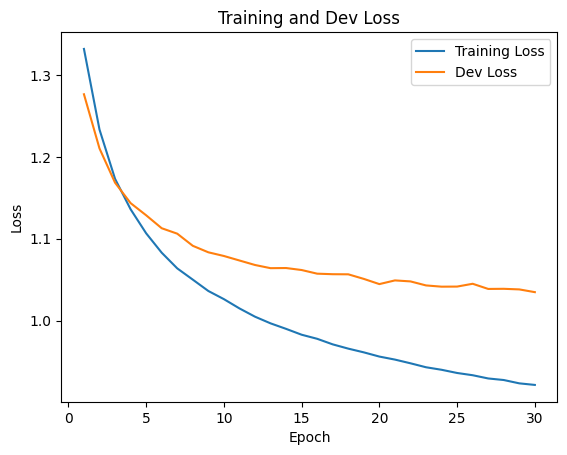

Load classifier
Loading model from "../models/neural/softmax_perceptron/dev-model-sm-perc-80.pth"
Evaluate classifier: ../models/neural/softmax_perceptron/dev-model-sm-perc-80.pth
Accuracy: 0.7349624060150376
Classification report:
              precision    recall  f1-score   support

   assertion       0.61      0.69      0.65       266
    question       0.74      0.76      0.75       266
   directive       0.83      0.85      0.84       266
  expressive       0.78      0.64      0.70       266

    accuracy                           0.73      1064
   macro avg       0.74      0.73      0.74      1064
weighted avg       0.74      0.73      0.74      1064

Confusion matrix:
            assertion  question  directive  expressive
assertion         183        26         20          37
question           51       202          3          10
directive          13        26        227           0
expressive         54        20         22         170


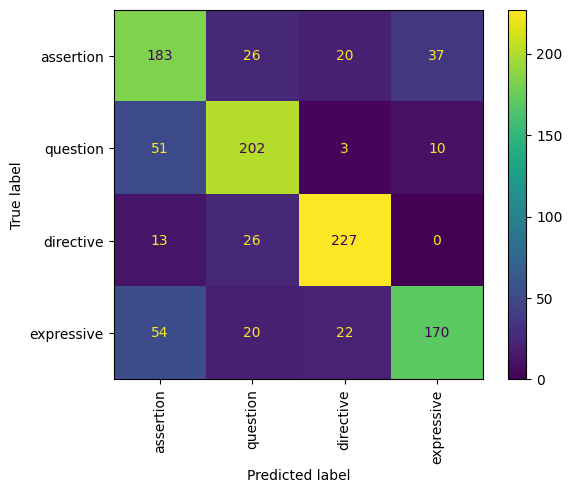

In [8]:
train_model(train_corpus, 
            test_corpus, 
            model_name='../models/neural/softmax_perceptron/dev-model-sm-perc-80.pth',
            network_factory=emb.softmax_perceptron,
            epochs=30)
results['dev-model-sm-perc-80'] = evaluate_model(
    test_corpus, 
    model_name='../models/neural/softmax_perceptron/dev-model-sm-perc-80.pth',
    network_factory=emb.softmax_perceptron)

# DEV: Softmax + Sigmoid 1 Hidden Layer 80%

Load classifier
Load dataset
Train classifier: ../models/neural/hidden-sigmoid/dev-model-sm-sig-hidden-80.pth


Training: epoch 1/30", unit="batch: 100%|██████████| 137/137 [00:31<00:00,  4.33it/s]


Epoch 1/30, Loss: 1.348751534510703


Eval on dev data: epoch 1/30", unit="batch: 100%|██████████| 34/34 [00:07<00:00,  4.37it/s]


Epoch 1/30, Dev loss: 1.2925360378097086


Training: epoch 2/30", unit="batch: 100%|██████████| 137/137 [00:32<00:00,  4.25it/s]


Epoch 2/30, Loss: 1.2186887316460158


Eval on dev data: epoch 2/30", unit="batch: 100%|██████████| 34/34 [00:07<00:00,  4.32it/s]


Epoch 2/30, Dev loss: 1.168494182474473


Training: epoch 3/30", unit="batch: 100%|██████████| 137/137 [00:32<00:00,  4.20it/s]


Epoch 3/30, Loss: 1.1144855226913508


Eval on dev data: epoch 3/30", unit="batch: 100%|██████████| 34/34 [00:07<00:00,  4.38it/s]


Epoch 3/30, Dev loss: 1.1086195917690502


Training: epoch 4/30", unit="batch: 100%|██████████| 137/137 [00:32<00:00,  4.25it/s]


Epoch 4/30, Loss: 1.0480033585624973


Eval on dev data: epoch 4/30", unit="batch: 100%|██████████| 34/34 [00:07<00:00,  4.28it/s]


Epoch 4/30, Dev loss: 1.0737819285953747


Training: epoch 5/30", unit="batch: 100%|██████████| 137/137 [00:31<00:00,  4.31it/s]


Epoch 5/30, Loss: 1.003351785405709


Eval on dev data: epoch 5/30", unit="batch: 100%|██████████| 34/34 [00:07<00:00,  4.47it/s]


Epoch 5/30, Dev loss: 1.0522688995389378


Training: epoch 6/30", unit="batch: 100%|██████████| 137/137 [00:32<00:00,  4.27it/s]


Epoch 6/30, Loss: 0.9735399423724543


Eval on dev data: epoch 6/30", unit="batch: 100%|██████████| 34/34 [00:07<00:00,  4.38it/s]


Epoch 6/30, Dev loss: 1.0399665885111864


Training: epoch 7/30", unit="batch: 100%|██████████| 137/137 [00:33<00:00,  4.04it/s]


Epoch 7/30, Loss: 0.9496209377790019


Eval on dev data: epoch 7/30", unit="batch: 100%|██████████| 34/34 [00:08<00:00,  4.03it/s]


Epoch 7/30, Dev loss: 1.0394833491129034


Training: epoch 8/30", unit="batch: 100%|██████████| 137/137 [00:36<00:00,  3.76it/s]


Epoch 8/30, Loss: 0.9329524727633399


Eval on dev data: epoch 8/30", unit="batch: 100%|██████████| 34/34 [00:08<00:00,  3.86it/s]


Epoch 8/30, Dev loss: 1.0353610971394707


Training: epoch 9/30", unit="batch: 100%|██████████| 137/137 [00:37<00:00,  3.68it/s]


Epoch 9/30, Loss: 0.9183186858239836


Eval on dev data: epoch 9/30", unit="batch: 100%|██████████| 34/34 [00:08<00:00,  3.91it/s]


Epoch 9/30, Dev loss: 1.0339081410099478


Training: epoch 10/30", unit="batch: 100%|██████████| 137/137 [00:36<00:00,  3.74it/s]


Epoch 10/30, Loss: 0.9066493067428143


Eval on dev data: epoch 10/30", unit="batch: 100%|██████████| 34/34 [00:08<00:00,  3.95it/s]


Epoch 10/30, Dev loss: 1.0260853521964128


Training: epoch 11/30", unit="batch: 100%|██████████| 137/137 [00:36<00:00,  3.72it/s]


Epoch 11/30, Loss: 0.8947572386177787


Eval on dev data: epoch 11/30", unit="batch: 100%|██████████| 34/34 [00:08<00:00,  3.79it/s]


Epoch 11/30, Dev loss: 1.019481040099088


Training: epoch 12/30", unit="batch: 100%|██████████| 137/137 [00:36<00:00,  3.75it/s]


Epoch 12/30, Loss: 0.8867554803834344


Eval on dev data: epoch 12/30", unit="batch: 100%|██████████| 34/34 [00:08<00:00,  3.89it/s]


Epoch 12/30, Dev loss: 1.025908804991666


Training: epoch 13/30", unit="batch: 100%|██████████| 137/137 [00:36<00:00,  3.72it/s]


Epoch 13/30, Loss: 0.8781649070064517


Eval on dev data: epoch 13/30", unit="batch: 100%|██████████| 34/34 [00:08<00:00,  3.81it/s]


Epoch 13/30, Dev loss: 1.0272234871106989


Training: epoch 14/30", unit="batch: 100%|██████████| 137/137 [00:37<00:00,  3.69it/s]


Epoch 14/30, Loss: 0.8729892233862494


Eval on dev data: epoch 14/30", unit="batch: 100%|██████████| 34/34 [00:09<00:00,  3.64it/s]


Epoch 14/30, Dev loss: 1.0267357913886799


Training: epoch 15/30", unit="batch: 100%|██████████| 137/137 [00:39<00:00,  3.43it/s]


Epoch 15/30, Loss: 0.8656813689391979


Eval on dev data: epoch 15/30", unit="batch: 100%|██████████| 34/34 [00:10<00:00,  3.30it/s]


Epoch 15/30, Dev loss: 1.0209414871299969


Training: epoch 16/30", unit="batch: 100%|██████████| 137/137 [00:37<00:00,  3.70it/s]


Epoch 16/30, Loss: 0.8610280482438359


Eval on dev data: epoch 16/30", unit="batch: 100%|██████████| 34/34 [00:08<00:00,  3.97it/s]


Epoch 16/30, Dev loss: 1.033094066030839


Training: epoch 17/30", unit="batch: 100%|██████████| 137/137 [00:36<00:00,  3.77it/s]


Epoch 17/30, Loss: 0.8563723494536686


Eval on dev data: epoch 17/30", unit="batch: 100%|██████████| 34/34 [00:08<00:00,  3.87it/s]


Epoch 17/30, Dev loss: 1.0283978861920975


Training: epoch 18/30", unit="batch: 100%|██████████| 137/137 [00:36<00:00,  3.80it/s]


Epoch 18/30, Loss: 0.8541658124784484


Eval on dev data: epoch 18/30", unit="batch: 100%|██████████| 34/34 [00:08<00:00,  3.92it/s]


Epoch 18/30, Dev loss: 1.0341891278238857


Training: epoch 19/30", unit="batch: 100%|██████████| 137/137 [00:37<00:00,  3.70it/s]


Epoch 19/30, Loss: 0.849967454036657


Eval on dev data: epoch 19/30", unit="batch: 100%|██████████| 34/34 [00:09<00:00,  3.67it/s]


Epoch 19/30, Dev loss: 1.0260878047522377


Training: epoch 20/30", unit="batch: 100%|██████████| 137/137 [00:38<00:00,  3.59it/s]


Epoch 20/30, Loss: 0.8447389372073821


Eval on dev data: epoch 20/30", unit="batch: 100%|██████████| 34/34 [00:09<00:00,  3.72it/s]


Epoch 20/30, Dev loss: 1.0369179091032814


Training: epoch 21/30", unit="batch: 100%|██████████| 137/137 [07:26<00:00,  3.26s/it] 


Epoch 21/30, Loss: 0.8432819025359884


Eval on dev data: epoch 21/30", unit="batch: 100%|██████████| 34/34 [00:07<00:00,  4.45it/s]


Epoch 21/30, Dev loss: 1.0310008034986609


Training: epoch 22/30", unit="batch: 100%|██████████| 137/137 [00:31<00:00,  4.41it/s]


Epoch 22/30, Loss: 0.8386138460061846


Eval on dev data: epoch 22/30", unit="batch: 100%|██████████| 34/34 [00:08<00:00,  4.11it/s]


Epoch 22/30, Dev loss: 1.0364688634872437


Training: epoch 23/30", unit="batch: 100%|██████████| 137/137 [33:46<00:00, 14.79s/it]   


Epoch 23/30, Loss: 0.8358277456603781


Eval on dev data: epoch 23/30", unit="batch: 100%|██████████| 34/34 [00:07<00:00,  4.47it/s]


Epoch 23/30, Dev loss: 1.0404929273268755


Training: epoch 24/30", unit="batch: 100%|██████████| 137/137 [00:32<00:00,  4.27it/s]


Epoch 24/30, Loss: 0.8352585465368563


Eval on dev data: epoch 24/30", unit="batch: 100%|██████████| 34/34 [00:07<00:00,  4.52it/s]


Epoch 24/30, Dev loss: 1.0410382344442255


Training: epoch 25/30", unit="batch: 100%|██████████| 137/137 [00:31<00:00,  4.30it/s]


Epoch 25/30, Loss: 0.8307826797457507


Eval on dev data: epoch 25/30", unit="batch: 100%|██████████| 34/34 [00:07<00:00,  4.46it/s]


Epoch 25/30, Dev loss: 1.0408244781634386


Training: epoch 26/30", unit="batch: 100%|██████████| 137/137 [00:31<00:00,  4.31it/s]


Epoch 26/30, Loss: 0.8286218543122285


Eval on dev data: epoch 26/30", unit="batch: 100%|██████████| 34/34 [00:07<00:00,  4.56it/s]


Epoch 26/30, Dev loss: 1.048034568043316


Training: epoch 27/30", unit="batch: 100%|██████████| 137/137 [00:31<00:00,  4.34it/s]


Epoch 27/30, Loss: 0.8257295123852082


Eval on dev data: epoch 27/30", unit="batch: 100%|██████████| 34/34 [00:07<00:00,  4.48it/s]


Epoch 27/30, Dev loss: 1.0457435074974508


Training: epoch 28/30", unit="batch: 100%|██████████| 137/137 [00:32<00:00,  4.24it/s]


Epoch 28/30, Loss: 0.8226493470860223


Eval on dev data: epoch 28/30", unit="batch: 100%|██████████| 34/34 [00:07<00:00,  4.48it/s]


Epoch 28/30, Dev loss: 1.0549763668985928


Training: epoch 29/30", unit="batch: 100%|██████████| 137/137 [00:31<00:00,  4.34it/s]


Epoch 29/30, Loss: 0.8224690178014936


Eval on dev data: epoch 29/30", unit="batch: 100%|██████████| 34/34 [00:07<00:00,  4.42it/s]


Epoch 29/30, Dev loss: 1.052942470592611


Training: epoch 30/30", unit="batch: 100%|██████████| 137/137 [00:31<00:00,  4.33it/s]


Epoch 30/30, Loss: 0.82018743727329


Eval on dev data: epoch 30/30", unit="batch: 100%|██████████| 34/34 [00:07<00:00,  4.64it/s]

Epoch 30/30, Dev loss: 1.0531752074466032
Training complete
Saving model to "../models/neural/hidden-sigmoid/dev-model-sm-sig-hidden-80.pth"


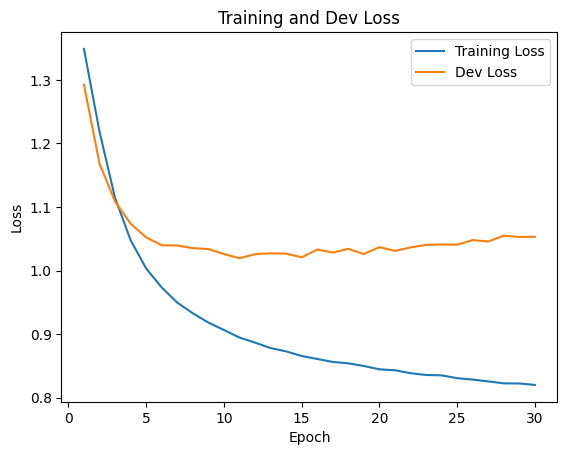

Load classifier
Loading model from "../models/neural/hidden-sigmoid/dev-model-sm-sig-hidden-80.pth"
Evaluate classifier: ../models/neural/hidden-sigmoid/dev-model-sm-sig-hidden-80.pth
Accuracy: 0.674812030075188
Classification report:
              precision    recall  f1-score   support

   assertion       0.46      0.74      0.57       266
    question       0.78      0.77      0.78       266
   directive       0.86      0.55      0.67       266
  expressive       0.81      0.64      0.72       266

    accuracy                           0.67      1064
   macro avg       0.73      0.67      0.68      1064
weighted avg       0.73      0.67      0.68      1064

Confusion matrix:
            assertion  question  directive  expressive
assertion         196        20         15          35
question           55       204          3           4
directive          92        27        147           0
expressive         80         9          6         171


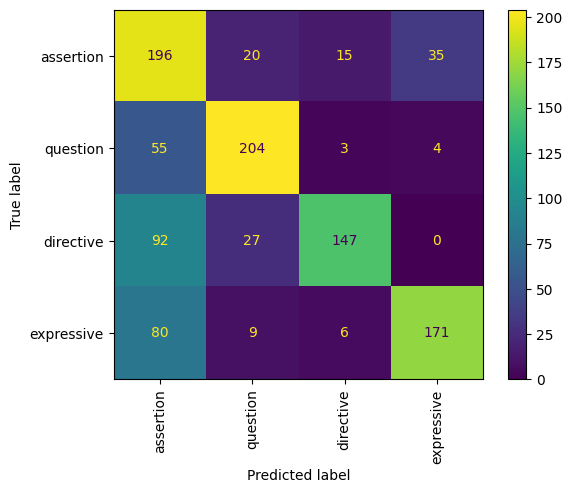

In [6]:
train_model(train_corpus, 
            test_corpus, 
            model_name='../models/neural/hidden-sigmoid/dev-model-sm-sig-hidden-80.pth',
            network_factory=emb.sigmoid_hidden_layer,
            epochs=30)
results['dev-model-sm-sig-hidden-80'] = evaluate_model(
    test_corpus, 
    model_name='../models/neural/hidden-sigmoid/dev-model-sm-sig-hidden-80.pth',
    network_factory=emb.sigmoid_hidden_layer)

# FINAL: Softmax + Sigmoid 1 Hidden Layer 1 epoch 

Load classifier
Load dataset
Train classifier: ../models/neural/hidden-sigmoid/final-model-sm-sig-hidden-80.pth


Training: epoch 1/1", unit="batch: 100%|██████████| 102932/102932 [12:23:18<00:00,  2.31it/s] 


Epoch 1/1, Loss: 1.013205067305959


Eval on dev data: epoch 1/1", unit="batch: 100%|██████████| 34/34 [00:13<00:00,  2.59it/s]


Epoch 1/1, Dev loss: 1.1279957872979782
Training complete
Saving model to "../models/neural/hidden-sigmoid/final-model-sm-sig-hidden-80.pth"


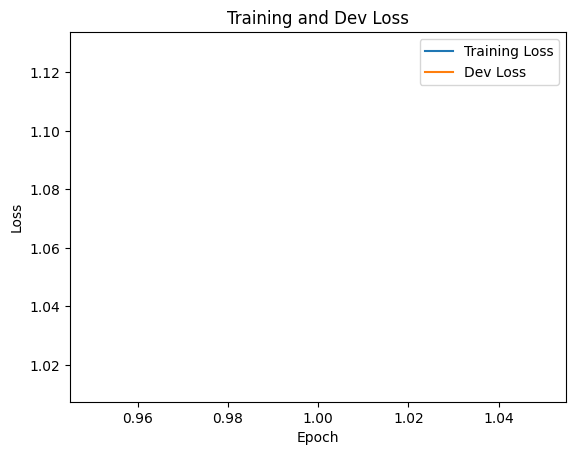

Load classifier
Loading model from "../models/neural/hidden-sigmoid/final-model-sm-sig-hidden-80.pth"
Evaluate classifier: ../models/neural/hidden-sigmoid/final-model-sm-sig-hidden-80.pth
Accuracy: 0.6306390977443609
Classification report:
              precision    recall  f1-score   support

   assertion       0.42      0.84      0.56       266
    question       1.00      0.91      0.95       266
   directive       1.00      0.04      0.07       266
  expressive       0.69      0.74      0.72       266

    accuracy                           0.63      1064
   macro avg       0.78      0.63      0.57      1064
weighted avg       0.78      0.63      0.57      1064

Confusion matrix:
            assertion  question  directive  expressive
assertion         223         1          0          42
question           21       241          0           4
directive         215         0         10          41
expressive         69         0          0         197


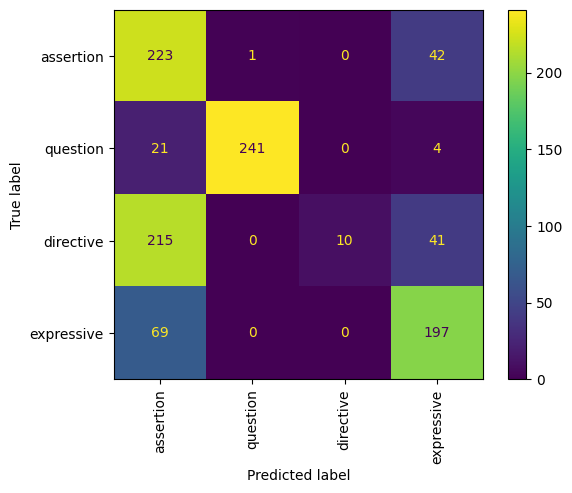

In [7]:
full_train_corpus = corp.Corpus('../data/auto-annotated data/speech-acts.conllu.bz2')

train_model(full_train_corpus, 
            test_corpus, 
            model_name='../models/neural/hidden-sigmoid/final-model-sm-sig-hidden-80.pth',
            network_factory=emb.sigmoid_hidden_layer,
            epochs=1)
results['final-model-sm-sig-hidden-80'] = evaluate_model(
    test_corpus, 
    model_name='../models/neural/hidden-sigmoid/final-model-sm-sig-hidden-80.pth',
    network_factory=emb.sigmoid_hidden_layer)